In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/user/OneDrive/Bureau/house pricing/Housing.csv", sep=",")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


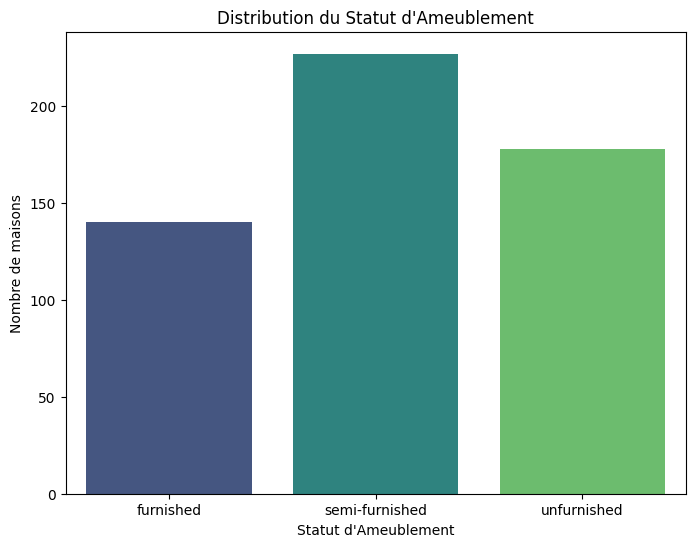

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='furnishingstatus', palette='viridis')

plt.title('Distribution du Statut d\'Ameublement')
plt.xlabel('Statut d\'Ameublement')
plt.ylabel('Nombre de maisons')
plt.show()

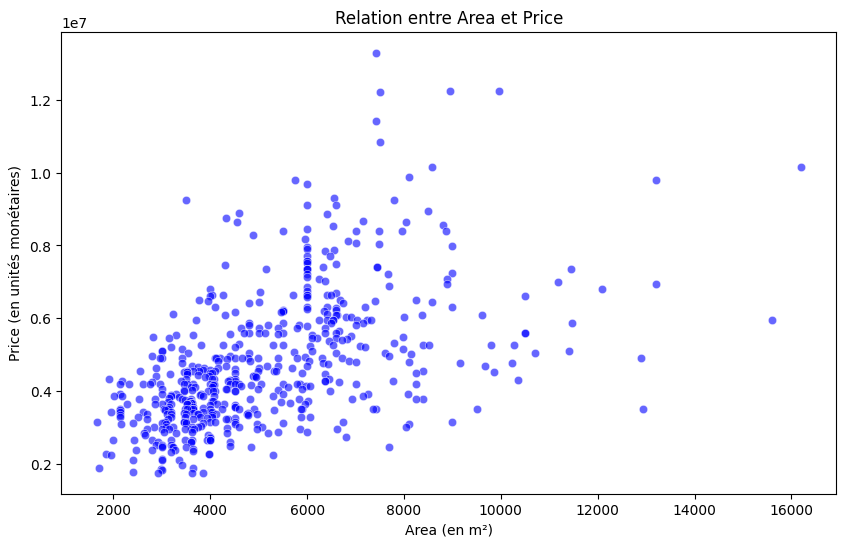

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price', alpha=0.6, color='blue')

plt.title('Relation entre Area et Price')
plt.xlabel('Area (en m²)')
plt.ylabel('Price (en unités monétaires)')
plt.show()

In [6]:
correlation = df['area'].corr(df['price'])
print(f"Corrélation entre area et price : {correlation:.2f}")

Corrélation entre area et price : 0.54


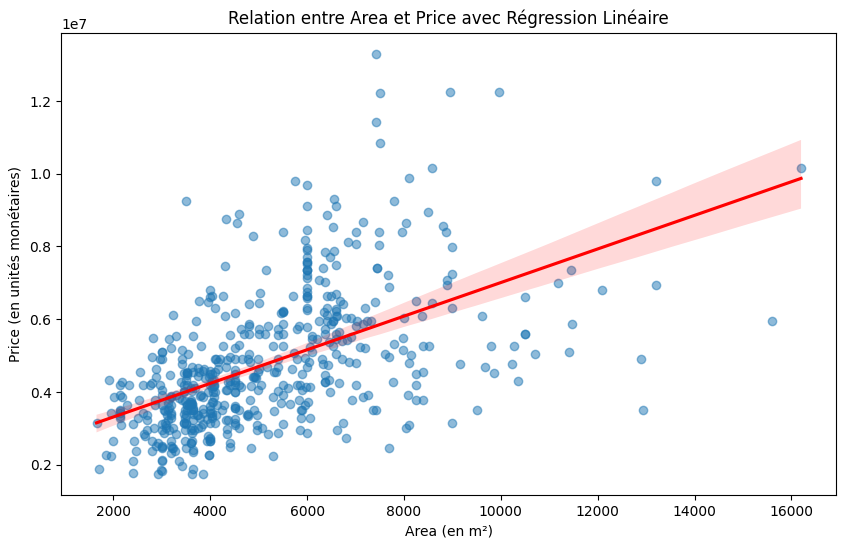

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='area', y='price', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Relation entre Area et Price avec Régression Linéaire')
plt.xlabel('Area (en m²)')
plt.ylabel('Price (en unités monétaires)')
plt.show()

In [8]:
correlation_bed = df['bedrooms'].corr(df['price'])
print(f"Corrélation entre area et price : {correlation_bed:.2f}")

Corrélation entre area et price : 0.37


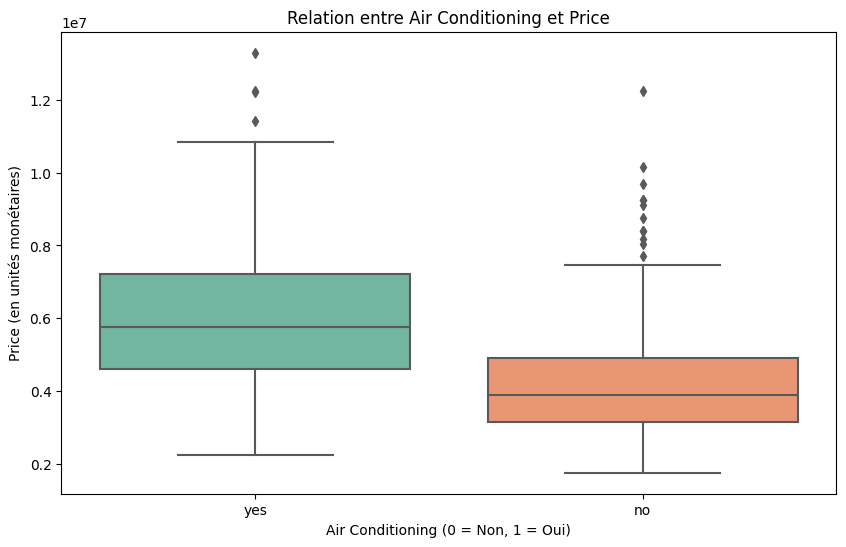

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer un box plot pour visualiser la relation entre 'airconditioning' et 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='airconditioning', y='price', palette='Set2')

plt.title('Relation entre Air Conditioning et Price')
plt.xlabel('Air Conditioning (0 = Non, 1 = Oui)')
plt.ylabel('Price (en unités monétaires)')
plt.show()

In [10]:
from scipy import stats

# Séparer les prix en fonction de la présence d'air conditionné
price_with_ac = df[df['airconditioning'] == 1]['price']
price_without_ac = df[df['airconditioning'] == 0]['price']

# Effectuer un test t de Student
t_stat, p_value = stats.ttest_ind(price_with_ac, price_without_ac, equal_var=False)
print(f"Statistique t : {t_stat:.2f}, p-value : {p_value:.4f}")

# Interprétation de la p-value
if p_value < 0.05:
    print("Il existe une différence significative entre les prix moyens avec et sans air conditionné.")
else:
    print("Aucune différence significative n'a été trouvée entre les prix moyens avec et sans air conditionné.")

Statistique t : nan, p-value : nan
Aucune différence significative n'a été trouvée entre les prix moyens avec et sans air conditionné.


In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


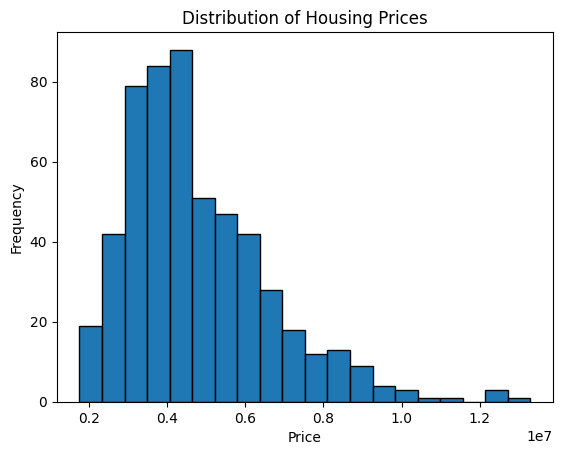

In [13]:
plt.hist(df['price'], bins=20, edgecolor='black')
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='furnishingstatus', ylabel='price'>

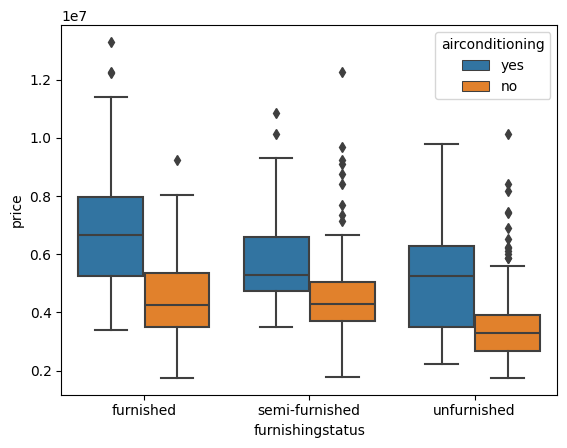

In [14]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

In [15]:
df[['price', 'area']].corr()

,price,area
price,1.000000,0.535997
area,0.535997,1.000000


<Axes: >

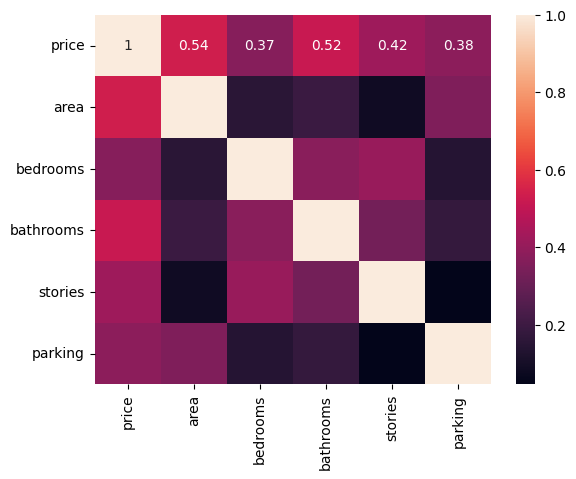

In [16]:
int_cols = df.select_dtypes(include=np.number).columns

sns.heatmap(df[int_cols].corr(), annot=True)

In [17]:
X = df.drop('price', axis=1)
y = df['price']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
X = pd.get_dummies(X, drop_first=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1311293225380.9094
R-squared: 0.6932116095944558


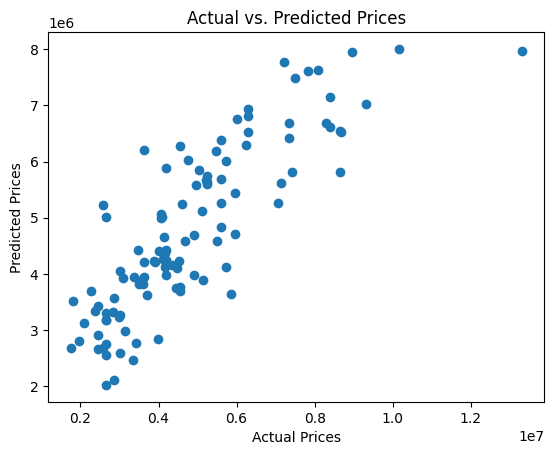

In [23]:
plt.scatter(y_test, ypred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [24]:
coefficients = model.coef_
intercept = model.intercept_

# Affichage des résultats
print("Intercept :", intercept)
print("Coefficients :", coefficients)
for feature, coef in zip(X.columns, coefficients):
    print(f"Variable {feature}: Coefficient {coef:.4f}")

Intercept : 255189.51585758012
Coefficients : [ 2.13813992e+02  4.96539506e+04  1.00421827e+06  4.73383152e+05
  2.76628332e+05  4.57532709e+05  2.43956594e+05  4.19390821e+05
  9.47745358e+05  8.09003674e+05  6.84230009e+05 -8.81381626e+03
 -3.78583323e+05]
Variable area: Coefficient 213.8140
Variable bedrooms: Coefficient 49653.9506
Variable bathrooms: Coefficient 1004218.2727
Variable stories: Coefficient 473383.1517
Variable parking: Coefficient 276628.3319
Variable mainroad_yes: Coefficient 457532.7089
Variable guestroom_yes: Coefficient 243956.5937
Variable basement_yes: Coefficient 419390.8207
Variable hotwaterheating_yes: Coefficient 947745.3580
Variable airconditioning_yes: Coefficient 809003.6737
Variable prefarea_yes: Coefficient 684230.0087
Variable furnishingstatus_semi-furnished: Coefficient -8813.8163
Variable furnishingstatus_unfurnished: Coefficient -378583.3233


In [25]:
new_data = np.array([[2000, 3, 2,0,0,0,0,0,0,0,0,0,0]])
predicted_value = np.dot(new_data, coefficients) + intercept
print("Valeur prédite :", predicted_value)

Valeur prédite : [2840215.896461]
